# Artificial Neural Networks

Martin Kersner, <m.kersner@gmail.com>

Inspired by http://neuralnetworksanddeeplearning.com/ and https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py.

* Perceptron
* Multilayer perceptron
* Backpropagation
* Forward pass
    * Activation functions
* Backward pass
    * Stochastic Gradient Descent
    * Weights update
* MNIST
* Keras

In [1]:
from __future__ import division
import random
import numpy as np
from utils import *
import matplotlib.pyplot as plt

%matplotlib inline

## Perceptron

<img src="files/perceptron.png" />

In [46]:
# PERCEPTRON - MATRIX MULTIPLICATION EXAMPLE

# weights
# w_1 = 1
# w_2 = 1.1
# w_3 = 0.1
# w_4 = 0.2
W = np.matrix([[1.0, 1.1, 0.1, 0.2]])

# input data
# x_1 = 0.5
# x_2 = 0.7
# x_3 = 3
# x_4 = 1.0
X = np.matrix([[0.5],
               [0.7],
               [3],
               [1.0]])

# bias
b = 1

# forward pass
z = np.dot(W, X) + b
print(z)

# Activation function
# a = activation_function(z)

[[ 2.77]]


## Multilayer perceptron

<img src="files/multi-layer-perceptron.png" />

In [47]:
# MULTILAYER PERCEPTRON - MATRIX MULTIPLICATION EXAMPLE

# weights
# w_11 = 1.0
# w_12 = 1.1
# w_13 = 1.3
# w_21 = 0.1
# w_22 = 0.2
# w_23 = 0.6
# w_31 = 0.4
# w_32 = 1.2
# w_32 = 1.9
W = np.matrix([[1.0, 1.1, 1.3], 
               [0.1, 0.2, 0.6],
               [0.4, 1.2, 1.9]])

# input data
# x_1 = 0.5
# x_2 = 0.7
# x_3 = 0.6
X = np.matrix([[0.5],
               [0.7],
               [0.6]])

# biases
b = np.matrix([[1.0],
               [1.0],
               [1.0]])


# forward pass
z = np.dot(W, X) + b
print(z)

# Activation function
# a = activation_function(z)

[[ 3.05]
 [ 1.55]
 [ 3.18]]


## Bias and weight initialization

In [11]:
# The biases and weights for the network are initialized randomly, using a Gaussian distribution
# with mean 0, and variance 1.
def init_biases(layers):
     return [np.random.randn(y, 1) for y in layers[1:]]
    
def init_weights(layers):
    return [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]

# 3-layer neural network
# input layer 10 neurons
# hidden layer 15 neurons
# output layer 7 neurons
layers_tmp = [10, 15, 7]

biases_tmp = init_biases(layers_tmp)
weights_tmp = init_weights(layers_tmp)

In [12]:
# BIASES in layers
for b in biases_tmp:
    print(len(b))

15
7


In [10]:
# BIAS VALUES
print(biases_tmp)

[array([[ 0.62861872],
       [ 0.87749937],
       [-0.42681781],
       [ 2.03876903],
       [-0.99044377],
       [-1.8378341 ],
       [ 0.60901879],
       [ 0.94985545],
       [ 1.06500423],
       [ 2.14882827],
       [-0.08968444],
       [-2.11499101],
       [ 0.67720556],
       [-0.83381318],
       [ 0.79473084]]), array([[ 1.0134096 ],
       [-0.99480337],
       [-1.04467281],
       [ 1.61890306],
       [-1.5788833 ],
       [-0.40097283],
       [ 0.52063158]])]


In [14]:
# WEIGHTS in layers
for w in weights_tmp:
    print(w.shape)

(15, 10)
(7, 15)


In [15]:
# WEIGHTS
print(weights_tmp)

[array([[  1.19566493e+00,   3.07449324e-01,   3.80059953e-03,
         -4.50449660e-01,  -2.32557005e-01,  -4.81581169e-02,
          4.61037443e-01,  -1.16048675e-01,  -2.41228857e-01,
          1.22735572e-01],
       [  3.06010916e-01,  -6.24408569e-01,  -1.36339708e+00,
          1.08882435e+00,   9.76329491e-01,  -3.58800271e-01,
         -1.50973524e-01,  -2.00418311e+00,  -8.72815539e-01,
          3.48648709e-01],
       [ -3.74901320e-01,  -1.61044721e-01,   9.62709762e-01,
         -2.35273354e-01,  -9.68733907e-01,  -1.36116129e+00,
          2.30242238e+00,  -7.71952252e-01,  -8.13748324e-01,
          1.24040880e-01],
       [ -6.64150045e-01,  -7.54327923e-01,   1.09983408e-01,
         -1.82816199e-01,   3.48986784e-01,  -1.04337528e-01,
          1.90284599e+00,   7.76496857e-01,  -1.73592909e+00,
         -2.06154527e-01],
       [  3.94573166e-01,  -5.35302732e-01,  -7.37788801e-02,
          2.66869979e-02,   5.18065377e-01,  -1.22785259e+00,
         -8.81004486e-0

## Sigmoid activation function

* Introduces non-linearity
* Saturation problem

<img src="files/sigmoid.png" />

Other types of activation functions http://cs231n.github.io/neural-networks-1/#actfun:
* Tanh
* ReLU
* Leaky ReLU
* ELU
* Maxout

In [16]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

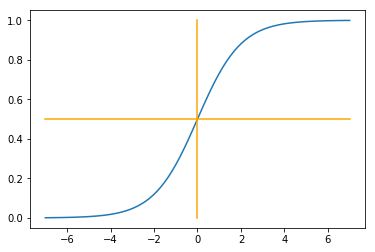

In [39]:
# Sigmoid function plot
x = np.linspace(-7, 7, 80)
plt.plot(x, sigmoid(x))

# center of sigmoid
plt.plot([0,0], [0, 1], c='orange')
plt.plot([-7,7], [0.5, 0.5], c='orange')

## Forward pass

In [41]:
def feedforward(biases, weights, a):
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
        
    return a

## Backward pass

* Derivative of sigmoid (http://www.ai.mit.edu/courses/6.892/lecture8-html/sld015.htm)

In [49]:
# Take a single training example, forward it through network, computes cost
# and compute gradient of weights and biases for each neuron.
def backprop(biases, weights, x, y):
    # Derivate of sigmoid
    def sigmoid_prime(z):
        return sigmoid(z)*(1-sigmoid(z))
    
    # Cost function
    def cost_derivative(output_activations, y):
        return (output_activations-y)    
    
    # gradients of the cost function for each layer
    nabla_b = zeros_like(biases)
    nabla_w = zeros_like(weights)
    
    # FORWARD PASS
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    
    for b, w in zip(biases, weights):
        z = np.dot(w, activation)+b        
        activation = sigmoid(z)
        
        # store all previous z and a vectors
        zs.append(z)
        activations.append(activation)
        
    # BACKWARD PASS
    # the last layer
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    
    # previous layers
    # going backwards layer by layer
    num_layers = len(weights)+1
    for l in xrange(2, num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(weights[-l+1].transpose(), delta) * sp
        
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        
    return (nabla_b, nabla_w)

## Minibatch

Minibatch is randomly selected training inputs of fixed size.

## Stochastic gradient descent

<img src="files/gradient-descent.png" />

<img src="files/sgd-update.png" />

In [50]:
# Update weights.
def update_mini_batch(biases, weights, mini_batch, eta):
    def update(v, nv, eta, mini_batch_size):
        return v-(eta/mini_batch_size)*nv
    
    def cumulate(nabla_v, delta_nabla_v):
        return [nv+dnv for nv, dnv in zip(nabla_v, delta_nabla_v)]
        
    nabla_b = zeros_like(biases)
    nabla_w = zeros_like(weights)
    
    # Collect weights and bias gradients for each minibatch and sum them
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = backprop(biases, weights, x, y)
        nabla_b = cumulate(nabla_b, delta_nabla_b)
        nabla_w = cumulate(nabla_w, delta_nabla_w)
    
    mini_batch_size = len(mini_batch)
    
    weights = [update(w, nw, eta, mini_batch_size)
               for w, nw in zip(weights, nabla_w)]
    
    biases = [update(b, nb, eta, mini_batch_size)
              for b, nb in zip(biases, nabla_b)]
    
    return biases, weights

## Training
* Epoch

In [ ]:
def SGD(biases, weights, training_data, epochs, mini_batch_size, eta, test_data=None):
    """Train the neural network using mini-batch stochastic
    gradient descent.  The ``training_data`` is a list of tuples
    ``(x, y)`` representing the training inputs and the desired
    outputs.  The other non-optional parameters are
    self-explanatory.  If ``test_data`` is provided then the
    network will be evaluated against the test data after each
    epoch, and partial progress printed out.  This is useful for
    tracking progress, but slows things down substantially."""
    
    def evaluate(biases, weights, data, training_data_evalution=False):
        if training_data_evalution:
            test_results = [(np.argmax(feedforward(biases, weights, x)), np.argmax(y)) for (x, y) in data]
        else:
            test_results = [(np.argmax(feedforward(biases, weights, x)), y) for (x, y) in data]

        return sum(int(x == y) for (x, y) in test_results)
    
    if test_data:
        n_test = len(test_data)

    n = len(training_data)
    test_acc_lst = []
    train_acc_lst = []
    
    for j in xrange(epochs):
        random.shuffle(training_data)
        
        mini_batches = [training_data[k:k+mini_batch_size] for k in xrange(0, n, mini_batch_size)]
        
        for mini_batch in mini_batches:
            biases, weights = update_mini_batch(biases, weights, mini_batch, eta)
            
        if test_data:
            test_acc = evaluate(biases, weights, test_data)
            test_acc_lst.append(test_acc/n_test)
            
            train_acc = evaluate(biases, weights, training_data, training_data_evalution=True)
            train_acc_lst.append(train_acc/n)
            
            print("Epoch {0}: {1} / {2}".format(j, test_acc, n_test))
        else:
            print("Epoch {0} complete".format(j))
            
    return biases, weights, train_acc_lst, test_acc_lst

## MNIST dataset
* http://yann.lecun.com/exdb/mnist/
* 28 by 28 pixels
* grayscale images

In [3]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

2


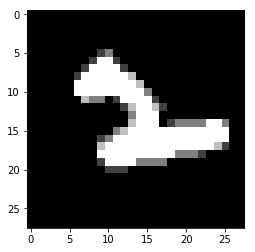

In [4]:
# Display random image and label from training data.

def random_data_sample(data):
    ri = random.randint(0, len(data)-1)
    X_rand = data[ri][0]
    y_rand = data[ri][1]
    
    return X_rand, y_rand

def display_random_digit(data):
    X_rand, y_rand = random_data_sample(data)

    rand_img = X_rand.reshape((28, 28))
    plt.figure()
    plt.imshow(rand_img, cmap='gray')
    
    print(np.argmax(y_rand))
    
display_random_digit(training_data)

## One hot encoding

In [ ]:
def display_random_one_hot_encoding(data):
    _, y_rand = random_data_sample(data)
    print(y_rand)
    plt.figure()
    plt.imshow(y_rand.T, cmap='gray')
    print(np.argmax(y_rand))
    
display_random_one_hot_encoding(training_data)

In [ ]:
# def evaluate(biases, weights, test_data):
#     """Return the number of test inputs for which the neural
#     network outputs the correct result. Note that the neural
#     network's output is assumed to be the index of whichever
#     neuron in the final layer has the highest activation."""
    
#     test_results = [(np.argmax(feedforward(biases, weights, x)), y) for (x, y) in test_data]
#     return sum(int(x == y) for (x, y) in test_results)

TODO display random numbers
TODO graph

In [ ]:
%time

# The first layer containing 2 neurons, the second layer 3 neurons, and the third layer 1 neuron.  
layers = [784, 30, 10]
biases = init_biases(layers)
weights = init_weights(layers)

# Training
epochs=3
mini_batch_size=10
eta=3.0

biases_final, weights_final, train_acc, test_acc = SGD(biases, weights, training_data, epochs, mini_batch_size, eta, test_data=validation_data)

# Plot training curves
plt.plot(range(len(test_acc)), test_acc, c="r")
plt.plot(range(len(train_acc)), train_acc, c="b")
plt.ylabel("accuracy")
plt.xlabel("epochs")

## Keras